# Predicting Pulsar Stars
Description & Attribute Information by Dr. Robert Lyon
#### Goal
We will try to predict if a star is a pulsar or not based on features.
#### Description
HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

#### Attribute Information
Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

Mean of the integrated profile.
Standard deviation of the integrated profile.
Excess kurtosis of the integrated profile.
Skewness of the integrated profile.
Mean of the DM-SNR curve.
Standard deviation of the DM-SNR curve.
Excess kurtosis of the DM-SNR curve.
Skewness of the DM-SNR curve.
Class
HTRU 2 Summary
17,898 total examples.
1,639 positive examples.
16,259 negative examples.

Source: https://archive.ics.uci.edu/ml/datasets/HTRU2

## Loading & Overviewing Datasets

#### Explore Head Data
We are getting the head of the data (top 5 rows) to explore a bit of the format of the dataset.                                              

In [1]:
import pandas as pd
data = pd.read_csv (r'C:\Users\Ye-An\Desktop\pulsar_stars.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


# Stage 1 Model Testing
Let's try to make a model that can predict if a star is a pulsar or not with a variety of algorithms.

#### Train Test Split
We are splitting the dataset into two sets: a training set and a testing set.
It is important to separate a training and testing set because we need to make sure the model (trained using the training set) has not seen the testing set to get accurate results on the model's accuracy.

In [3]:
from sklearn.model_selection import train_test_split
X = data.drop('target_class',axis=1)
y = data['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision Tree Algorithm
Let's try to use the decision tree algorithm on this dataset.

In [4]:
#Creating instance of decision tree object (train test split already done)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

#Printing results from testing
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
dt_cr = classification_report(y_test,predictions)
print("Classification Report")
print(dt_cr)
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4861
           1       0.85      0.81      0.83       509

   micro avg       0.97      0.97      0.97      5370
   macro avg       0.91      0.90      0.91      5370
weighted avg       0.97      0.97      0.97      5370

 
Confusion Matrix
[[4787   74]
 [  95  414]]


# Random Forest Algorithm
Let's try to use the random forest algorithm on this dataset.

In [5]:
#Creating instance of Random Forest object (train test split already done)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train,y_train)

#Print results from testing
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
rf_cr = classification_report(y_test,predictions)
print("Classification Report")
print(rf_cr)
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4861
           1       0.92      0.83      0.87       509

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.95      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370

 
Confusion Matrix
[[4823   38]
 [  88  421]]


# Support Vector Machine Algorithm
Let's try to use the SVM algorithm on this dataset.

In [6]:
#Creating instance of SVM object (train test split already done)
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

#Print results from testing
predictions = svc_model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
svm_cr = classification_report(y_test,predictions)
print("Classification Report")
print(svm_cr)
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y_test,predictions))

C:\Users\Ye-An\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4861
           1       1.00      0.02      0.03       509

   micro avg       0.91      0.91      0.91      5370
   macro avg       0.95      0.51      0.49      5370
weighted avg       0.92      0.91      0.86      5370

 
Confusion Matrix
[[4861    0]
 [ 500    9]]


### Conclusions
We noticed that the Random Forest algorithm worked the best, but not with a really great accuracy. Let's see if we can improve it a little bit with feature engineering.

## Stage 2 Model Testing

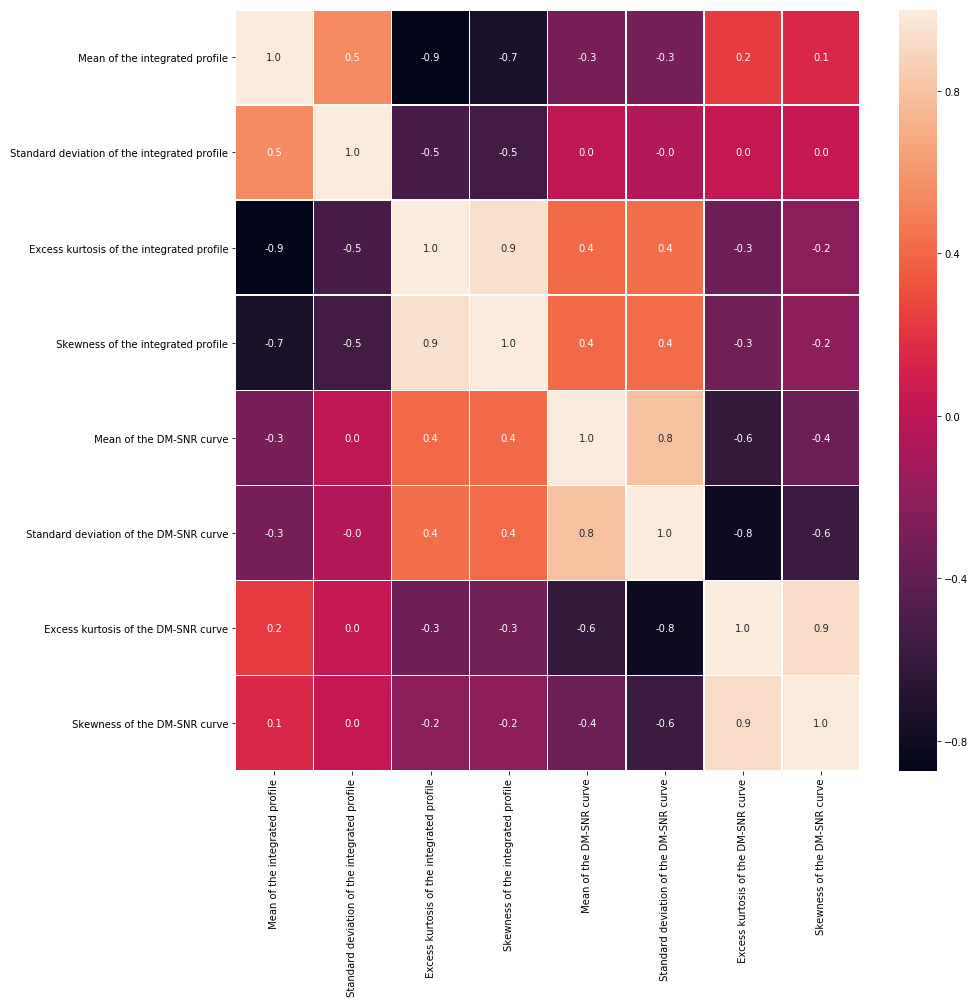

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
x = data.drop('target_class', axis=1)
y = data.target_class
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Getting rid of some very highly correlated features:
- Excess kurtosis of the integrated profile
- Excess kurtosis of the DM-SNR curve
- Standard deviation of the DM-SNR curve

In [24]:
dropList = [' Excess kurtosis of the integrated profile',' Excess kurtosis of the DM-SNR curve',' Standard deviation of the DM-SNR curve']
data_v1 = data.drop(dropList, axis=1)

New correlation heatmap:

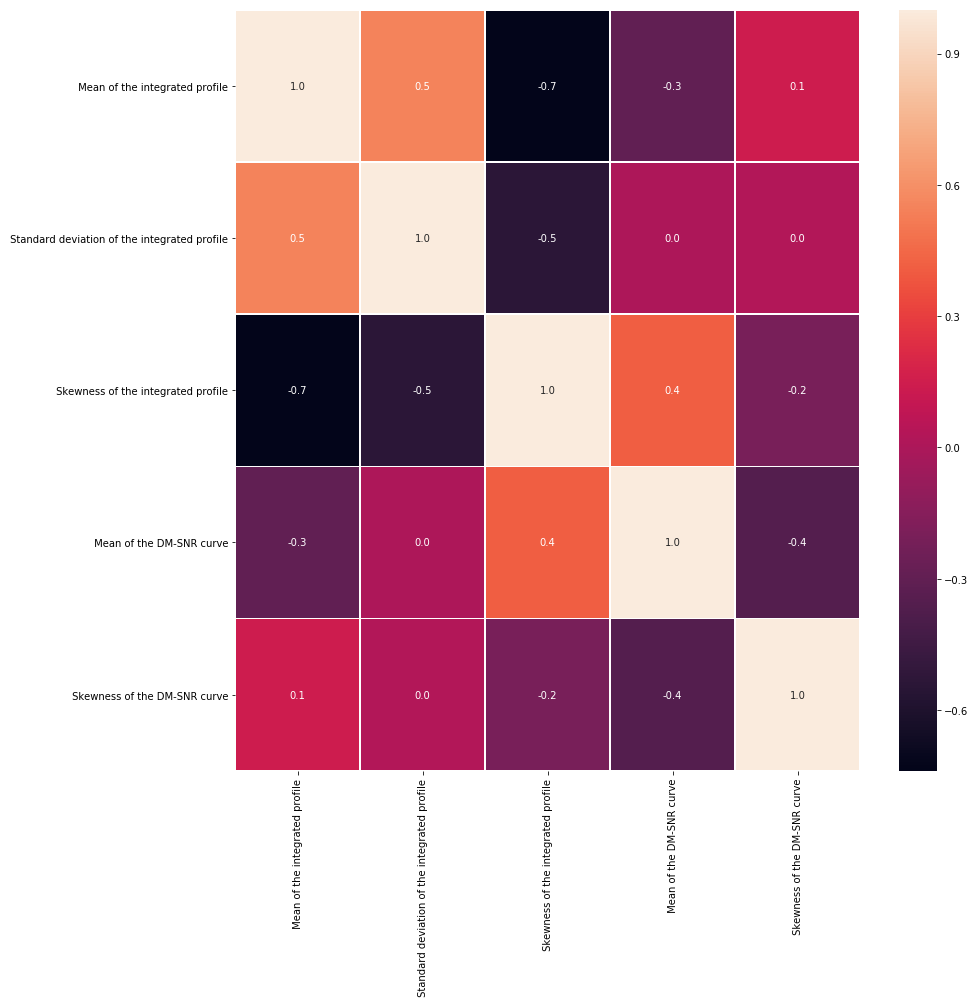

In [25]:
x = data_v1.drop('target_class', axis=1)
y = data_v1.target_class
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X = data_v1.drop('target_class',axis=1)
y = data_v1['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Tree

In [27]:
#Creating instance of decision tree object (train test split already done)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

#Printing results from testing
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
dt_cr = classification_report(y_test,predictions)
print("Classification Report")
print(dt_cr)
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4857
           1       0.79      0.83      0.81       513

   micro avg       0.96      0.96      0.96      5370
   macro avg       0.89      0.90      0.89      5370
weighted avg       0.96      0.96      0.96      5370

 
Confusion Matrix
[[4746  111]
 [  88  425]]


In [28]:
#Creating instance of Random Forest object (train test split already done)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

#Print results from testing
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
rf_cr = classification_report(y_test,predictions)
print("Classification Report")
print(rf_cr)
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4857
           1       0.92      0.82      0.87       513

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.95      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370

 
Confusion Matrix
[[4821   36]
 [  92  421]]


# Interactive Shell

In [32]:
print("----------------------------------------------------------------------")
print("                        PREDICTING PULSAR STARS                       ")

while True:
    print("----------------------------------------------------------------------")
    print("Enter a command.")
    print("     (p) predict      (a) model accuracy      (q) quit")
    command = input(":: ")
    print("----------------------------------------------------------------------")
    if command == 'a':
        print(" ")
        print("Model Accuracy")
        print("Current model: Random Forest Algorithm")
        print("N Estimators: 100")
        print(rf_cr)
        print("")
    if command == 'q':
        print("")
        if int(input("Are you sure you want to quit (0/1)? ")) == 1:
            print("Quitting.")
            break
    if command == 'p':
        print(" ")
        print("A set of 5 measurements will be asked to classify the star as a pulsar or not.")
        print("Please answer as accurately as possible.\n")
        a = float(input("Mean of the integrated profile: "))
        b = float(input("Standard deviation of the integrated profile: "))
        c = float(input("Skewness of integrated profile: "))
        d = float(input("Mean of the DM-SNR curve: "))
        e = float(input("Skewness of the Dm-SNR curve: "))
        values = np.array([a,b,c,d,e])        
        print("")
        print("Predicting...")
        print("")
        
        prediction = rfc.predict(values.reshape(1,-1))
    
        if prediction == [1]:
            print("")
            print("Classification: Pulsar")
        elif prediction == [0]:
            print("")
            print("Classification: Not Pulsar")

----------------------------------------------------------------------
                        PREDICITNG PULSAR STARS                       
----------------------------------------------------------------------
Enter a command.
     (p) predict      (a) model accuracy      (q) quit
:: p
----------------------------------------------------------------------
 
A set of 5 measurements will be asked to classify the star as a pulsar or not.
Please answer as accurately as possible.

Mean of the integrated profile: 100
Standard deviation of the integrated profile: 200
Skewness of integrated profile: 1000
Mean of the DM-SNR curve: 3
Skewness of the Dm-SNR curve: 2

Predicting...


Classification: Pulsar
----------------------------------------------------------------------
Enter a command.
     (p) predict      (a) model accuracy      (q) quit
:: a
----------------------------------------------------------------------
 
Model Accuracy
Current model: Random Forest Algorithm
N Estimators: 100
